<a href="https://colab.research.google.com/github/Shailendra114/Play-Store-App-Review-Analysis/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

# The objective of this project is to deliver insights to understand customer demands better and thus help developers to popularize the product. It is of 10k Play Store apps for analyzing the Android market. This dataset contains details of different applications and reviews from different users.


# Part 1--(Play store Data of Apps and Features)

Discussion of Google play store dataset will involve various steps such as:

1. Loading the data into data frame
2. Cleaning the data
3. Extracting statistics from the dataset
4. Exploratory Analysis and Visualizations
5. Questions that can be asked from the dataset
6. Conclusion

Now we are good to go and have fun-----






In [ ]:
#important libraries which we wil be using in our project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas_profiling as pp
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px



#Step 1. Loading data into Dataframe

In [ ]:
#Lets mount our drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Lets upload our file
df= pd.read_csv('/content/drive/MyDrive/Play Store Data.csv')

In [ ]:
#since we have uploaded our data lets check type of our data
type(df)

pandas.core.frame.DataFrame

In [ ]:
# lets check how our data look from top
df.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
#lets check it from bottom
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


Wow! how beautiful it is



In [ ]:
#lets check shape of our data
df.shape

(10841, 13)

In [ ]:
#lets explore statistical things of our data
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


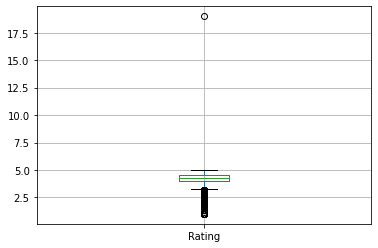

In [ ]:
#lets check is there any outliner or not
df.boxplot()

**So, in our data there is outliner as well.Outliers are data points that are far from other data points. In other words, they're unusual values in a dataset.Since ratings cannot be more than 5 therefore there is outlier in our data**

In [ ]:
#lets check information of our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


So,these are the different data types whcich are present in our data.Since Reviews contains numerical values so it should be in float,similiarly Size,installs,price should also be float data type and last update should be datetime datatype.We will correct it in second step.

In [ ]:
#lets check is there any missing value or not in our Data
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

So,there are null values in our data.
Rating has 1474 null values,type has 1 null value,current ver has 8 and Android Ver has 3 null values.

#Step 2. Cleaning the Data

Since we have taken an overwiew of our data.Now lets clean it. 

**1. Cleaning outliers**

In [ ]:
#lets check how many outliners are there
df[df.Rating>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


So,there is only one outlier that is on row no.10472.So we have to drop it.

In [ ]:
#lets drop outliner
df.drop([10472],inplace=True)

In [ ]:
#lets check whether row no.10472 is in our data or dropped
10472 in df


False

Great guys,I have removed outlier successfully.lets see it graphically as


---



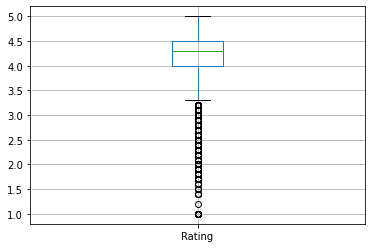

In [ ]:
df.boxplot()

**2. Converting data into proper data structures.**

In [ ]:
#since reviews are showing as object datatype in info so we need to convert it into inter datatype.
df['Reviews']=df['Reviews'].apply(lambda x:x.replace("3.0M","3000000"))
df['Reviews']=df['Reviews'].apply(lambda x: int(x))

In [ ]:
#convert price into float datatype
df['Price']=df['Price'].apply(lambda x: x.replace("$","") if "$" in str(x) else x)
df['Price']=df['Price'].apply(lambda x:float(x))

In [ ]:
#convert size into proper datatype
df['Size']=df['Size'].apply(lambda x : str(x).replace("Varies with device","NaN") if "Varies with device" in str(x) else x)
df['Size']=df['Size'].apply(lambda x:  str(x).replace("M","") if "M" in str(x) else x)
df['Size']=df['Size'].apply(lambda x:  float(str(x).replace("k",""))/1000 if "k" in str(x) else x)
df['Size']=df['Size'].apply(lambda x:  float(x))

In [ ]:
#convert Installs into proper datatype
df['Installs']=df['Installs'].apply(lambda x : x.replace("+","")if "+" in str(x) else x)
df['Installs']=df['Installs'].apply(lambda x: x.replace(",","") if "," in str(x) else x)
df['Installs']=df['Installs'].apply(lambda x: int(x))

In [ ]:
#convert last updated into datetime datatype
df['Last Updated'].unique()
df['Last Updated']=pd.to_datetime(df['Last Updated'])

In [ ]:
#unique category
len(df['Category'].unique())

33

So,great has happened that we have converted our data into proper datatype

**3. Removing null values**

Since our data has null values as well,lets remove it


In [ ]:
#lets remove null values
df.interpolate(method='linear',limit_direction='forward',inplace=True)

In [ ]:
#lets check null values again
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

There are still null values in Type,Current Ver and Android Ver.Since Current Ver and Android Ver are not of much relevent for our data,lets drop it and Convert Type into proper datatype

In [ ]:
#drop Current Ver and Android Ver 
df=df.drop(['Current Ver','Android Ver'],axis=1)

In [ ]:
#lets convert Type into proper datatype
df['Type'].fillna(value='Free',inplace=True)

In [ ]:
#now lets check info again for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          10840 non-null  float64       
 3   Reviews         10840 non-null  int64         
 4   Size            10840 non-null  float64       
 5   Installs        10840 non-null  int64         
 6   Type            10840 non-null  object        
 7   Price           10840 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Genres          10840 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2), object(5)
memory usage: 1016.2+ KB


Great guys,data is converted into proper datatype and there is no null values.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f632bfb7a10>,
      dtype=object)

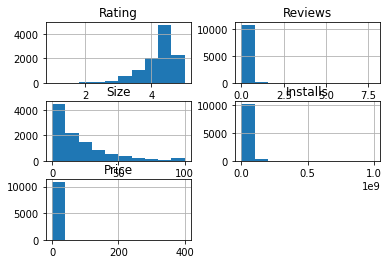

In [ ]:
#lets see how our data looks after cleaning data
df.hist()

Guys, We have checked basic info of data as well as we have done cleaning of our data as well,so now lets do some exploration and visulations

#Step 3. Extracting statistics from the dataset

---



**1. Statistics of data through pandas profiling**

In [165]:
#lets do some statistics of data through pandas profiling
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


In [166]:
#lets import profile report using pandas profiling
from pandas_profiling import profile_report

ImportError: ignored

In [167]:
df.profile_report()

AttributeError: ignored

**2. Statistics of Data**

In [ ]:
#lets see statistics of our data
df.describe()

,Rating,Reviews,Size,Installs,Price
count,10840.000000,1.084000e+04,10840.000000,1.084000e+04,10840.000000
mean,4.190567,4.441529e+05,21.906488,1.546434e+07,1.027368
std,0.517606,2.927761e+06,21.965509,8.502936e+07,15.949703
min,1.000000,0.000000e+00,0.008500,0.000000e+00,0.000000
25%,4.000000,3.800000e+01,5.400000,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,14.000000,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,30.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


#Step 4. Exploratory Data Analysis (EDA) and Visualization

**1. Data Visualization**

In [ ]:
#lets visualize the data using plotly library
grp=df.groupby('Category')
x=grp['Installs'].agg(np.mean)
y=grp['Price'].agg(np.sum)
z=grp['Reviews'].agg(np.mean)
print(x)
print(y)
print(z)

Category
ART_AND_DESIGN         1.912894e+06
AUTO_AND_VEHICLES      6.250613e+05
BEAUTY                 5.131519e+05
BOOKS_AND_REFERENCE    8.318050e+06
BUSINESS               2.178076e+06
COMICS                 9.347692e+05
COMMUNICATION          8.435989e+07
DATING                 1.129533e+06
EDUCATION              5.586231e+06
ENTERTAINMENT          1.925611e+07
EVENTS                 2.495806e+05
FAMILY                 5.201959e+06
FINANCE                2.395215e+06
FOOD_AND_DRINK         2.156683e+06
GAME                   3.066960e+07
HEALTH_AND_FITNESS     4.642441e+06
HOUSE_AND_HOME         1.917187e+06
LIBRARIES_AND_DEMO     7.411284e+05
LIFESTYLE              1.407444e+06
MAPS_AND_NAVIGATION    5.286729e+06
MEDICAL                1.150269e+05
NEWS_AND_MAGAZINES     2.648876e+07
PARENTING              5.253518e+05
PERSONALIZATION        5.932385e+06
PHOTOGRAPHY            3.011417e+07
PRODUCTIVITY           3.343418e+07
SHOPPING               1.249173e+07
SOCIAL             

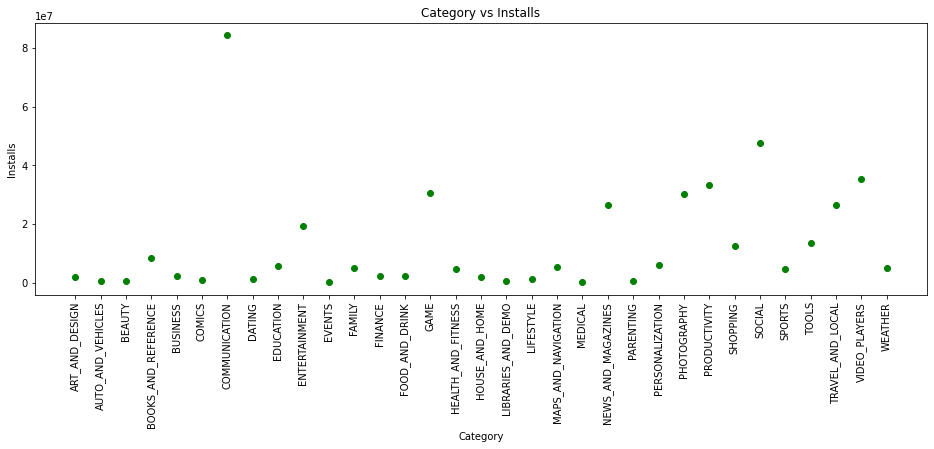

In [ ]:
plt.figure(figsize=(16,5))
plt.plot(x,'ro',color='g')
plt.xticks(rotation=90)
plt.title('Category vs Installs')
plt.xlabel('Category')
plt.ylabel('Installs')
plt.show()

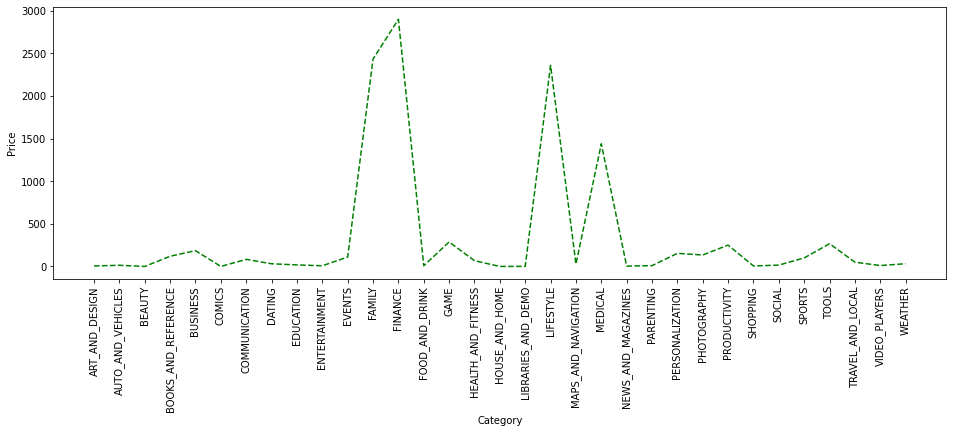

In [ ]:
plt.figure(figsize=(16,5))
plt.plot(y,'r--',color='g')
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Price')
plt.show()

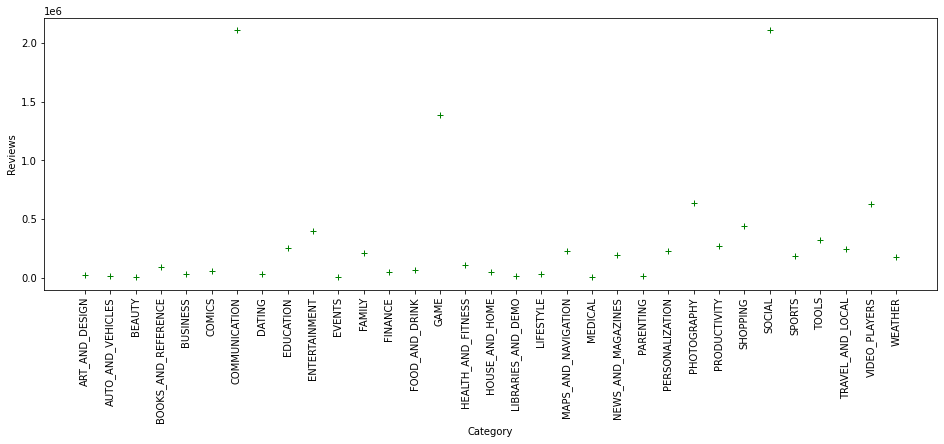

In [ ]:
plt.figure(figsize=(16,5))
plt.plot(z,'r+',color='g')
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Reviews')
plt.show()

# Sorry guys,i am not able to draw a good amount of insight from above graphs.

**2. Average rating per Category**

In [ ]:
#lets visualize average rating per category using plotly library
Average_rating_per_category=df.groupby('Category')['Rating'].median().reset_index()

In [ ]:
#lets plot graph using plotly library
px.bar(data_frame=Average_rating_per_category,x=Average_rating_per_category['Category'],y=Average_rating_per_category['Rating'],text='Rating',title='Average Rating Per Category')

In [ ]:
print(round(np.mean(df['Rating']),1))

4.2


So, the average rating per category is about 4.2 out of 5.

# From above graph,we can see clearly the average rating per category.We can see that the average rating is from 4.1 to 4.5.

**3.Total no. of application per Category**

In [ ]:
#lets calculate total no of application per category
total_no_of_application_per_category=df['Category'].value_counts().reset_index()

In [ ]:
#lets rename colunms 
total_no_of_application_per_category.set_axis(['Category','Count'],axis=1,inplace=True)

In [ ]:
#lets plot the total no. of application downloaded per category using plotly
px.bar(data_frame=total_no_of_application_per_category,x=total_no_of_application_per_category['Category'],y=total_no_of_application_per_category['Count'],text="Count",title='Total Number of Application Per Category')


#Great guys,this plot is making sense to me. From above graph,we can clearly see that the most number of application is in the category Family(1972) followed by Game(1144).

**4. Most Space required Category in percentage**

In [ ]:
#lets calculate most space required category
Most_space_required_Category=df.groupby('Category',as_index=False)['Size'].sum().sort_values(by='Size',ascending=False)

In [ ]:
#lets calculate total size of category in our dataset
Total_size=df['Size'].sum()

In [ ]:
#lets calculate most space required category in percentage by creating a new column in the same
Most_space_required_Category['in percentage']=Most_space_required_Category['Size']*100/Total_size

In [ ]:
#lets apply lymbda function for significant decimal point in percentage
Most_space_required_Category['in percentage']=Most_space_required_Category['in percentage'].apply(lambda x: "{0:1.2f}%".format(x))


In [ ]:
#lets plot graph for most space required category in percentage
px.bar(data_frame=Most_space_required_Category,x=Most_space_required_Category.Category,y=Most_space_required_Category['Size'],title="Most Space Required Category in percentage",text='in percentage')

# Good to tell that i can draw insight from this graph.According to this graph, the most space required category is Family(23.76%) followed by Game(21.57%)

**5.Content Rating per Category**

In [ ]:
#lets try to calculate conent rating per category
x2 = df['Content Rating'].value_counts().index
y2 =df['Content Rating'].value_counts()

x2sis = []
y2sis = []
for i in range(len(x2)):
    x2sis.append(x2[i])
    y2sis.append(y2[i])


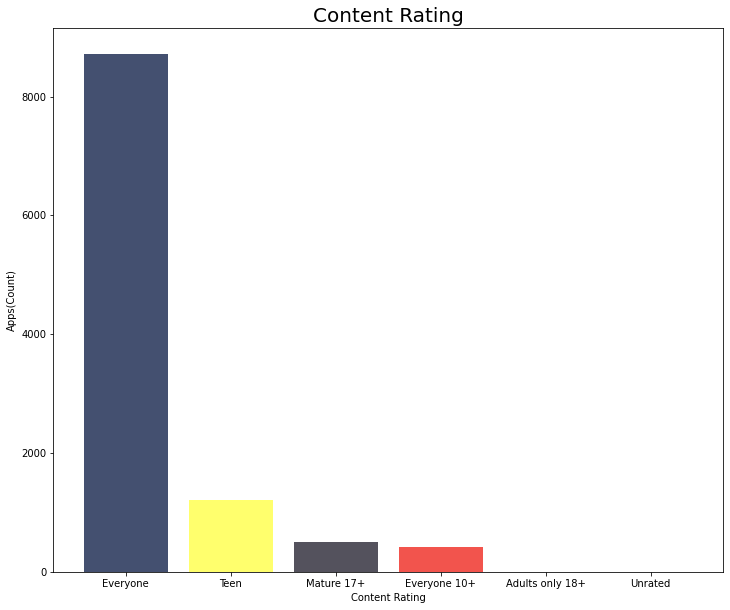

In [ ]:
#lets plot graph fir content rating per category
plt.figure(figsize=(12,10))
plt.bar(x2sis,y2sis,width=0.8,color=['#15244C','#FFFF48','#292734','#EF2920','#CD202D','#ECC5F2'], alpha=0.8)
plt.title('Content Rating',size = 20)
plt.ylabel('Apps(Count)')
plt.xlabel('Content Rating')
plt.show()

# From above bar plot, we are able draw insight that the application that  has content rating everyone has maximum no. of apps

**6. Percentage of free Vs Paid apps** 

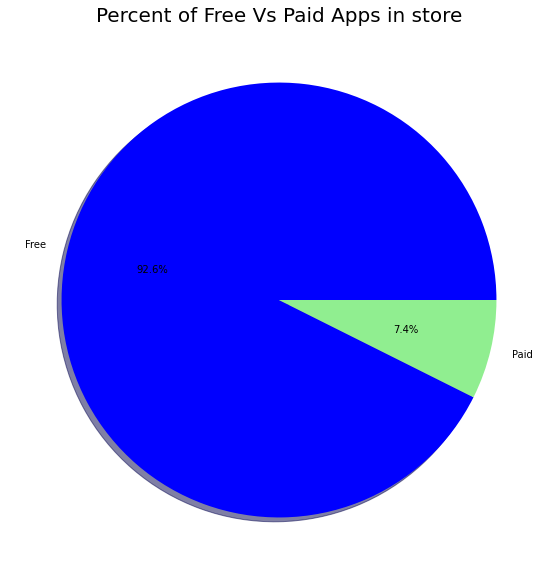

In [ ]:
plt.figure(figsize=(10,10))
labels = df['Type'].value_counts(sort = True).index
sizes = df['Type'].value_counts(sort = True)
colors = ["blue","lightgreen"]
explode = (0.2,0)
plt.pie(sizes,labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('Percent of Free Vs Paid Apps in store',size = 20)
plt.show()

#From above pie plot we are able to see the percentage of apps in free and paid category.We can see that there are more application in free category than paid.There are approximately 93% apps in free category and 7% in paid category.

**7. Apps size distribution**

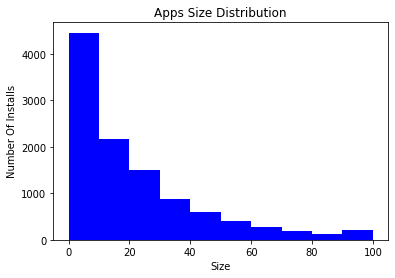

In [ ]:
#lets plot graph for app size distribution
plt.hist(df['Size'],color='b')
plt.xlabel('Size')
plt.ylabel("Number Of Installs")
plt.title("Apps Size Distribution")
plt.show()

#From above plot we are able to tell that the size distribution of most of the apps are between 0 to 20 MB


 **8. Most reviewed Category in percent**

In [ ]:
#lets define most reviewed category variable
most_reviewed_category=df.groupby('Category',as_index=False)['Reviews'].sum()

In [ ]:
#lets calculate total reviews
total_reviews=df['Reviews'].sum()

In [ ]:
#lets define a new variable most reviewed in percent
most_reviewed_category['in percent']=most_reviewed_category['Reviews']*100/total_reviews

In [ ]:
most_reviewed_category['in percent']=most_reviewed_category['in percent'].apply(lambda x: "{0:1.2f}%".format(x))

In [ ]:
most_reviewed=px.bar(data_frame= most_reviewed_category, x = most_reviewed_category.Category, y = most_reviewed_category.Reviews,title='Most Reviewed Category in Percentage',text="in percent")
most_reviewed

# from above graph we can see that game category is most reviewed category followed by communication

**9. Most installed Category**

In [ ]:
#lets define a highest installs variable
highest_Installs_df = df.groupby('Category')[['Installs']].sum().sort_values(by='Installs', ascending=False)

Text(0.5, 1.0, 'Installs')

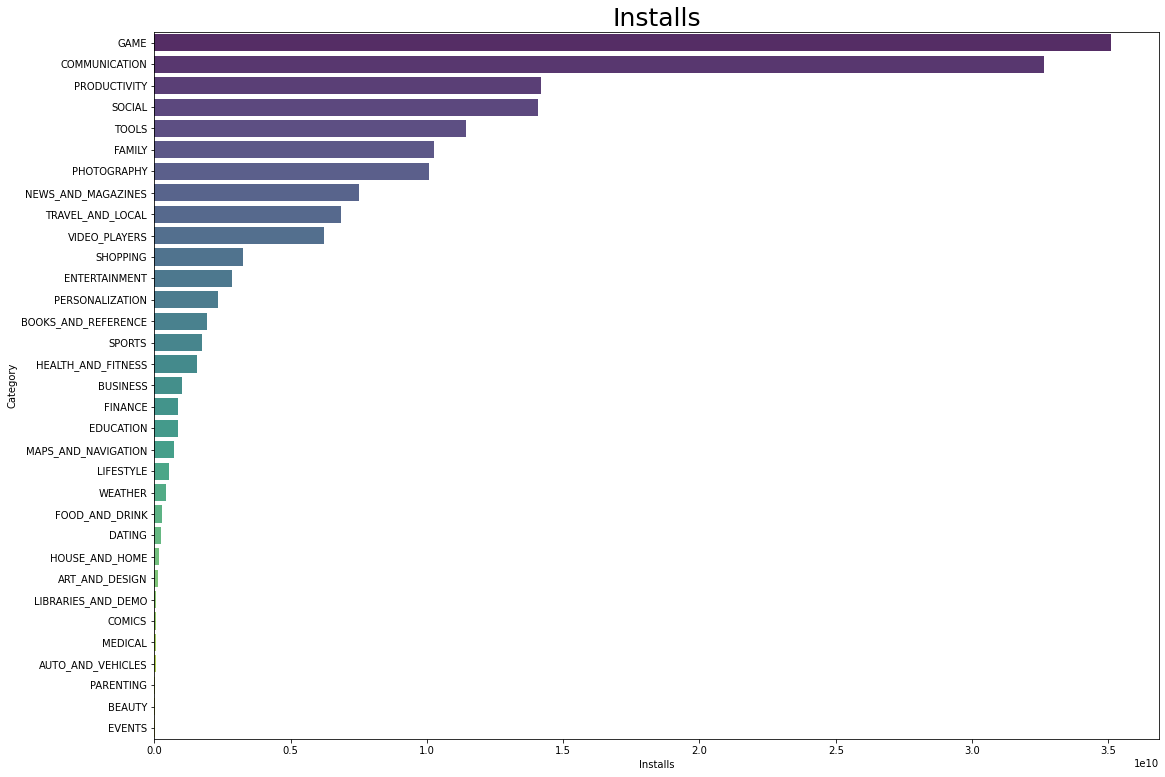

In [ ]:
#lets define a function to calculate most installed category
x2sis = []
y2sis = []

for i in range(len(highest_Installs_df)):
    x2sis.append(highest_Installs_df.Installs[i])
    y2sis.append(highest_Installs_df.index[i])

plt.figure(figsize=(18,13))

plt.xlabel("Installs")
plt.ylabel("Category")
graph = sns.barplot(x = x2sis, y = y2sis, alpha =0.9, palette= 'viridis')
graph.set_title("Installs", fontsize = 25)

# From above plot, we can see that Game,Communication and productivity are the top three category with highest installs.

**10. Heatmap**

A heatmap is a two-dimensional graphical representation of data where the individual values that are contained in a matrix are represented as colors. The seaborn python package allows the creation of annotated heatmaps which can be tweaked using Matplotlib tools as per the creator’s requirement.

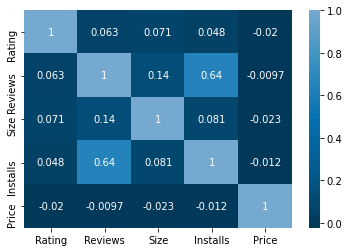

In [ ]:
#lets see corelation using heatmap
sns.heatmap(df.corr(),annot=True,cmap='PuBu_r',center=True,cbar=True)
plt.show()

# From above heatmap, we can see relation between different features.we can see that reviews and installs are highly related.

**11. Number of installation According to Category type in percent**

In [ ]:
#lets define a variable for category type
Category_type=df.groupby(['Category','Type'],as_index=False)['Installs'].sum()

Since there are two Category----one is free and other is paid and we want to know which category type is used most by people.lets see they look

In [ ]:
#lets see category type difference between free and paid
Category_type.head()

,Category,Type,Installs
0,ART_AND_DESIGN,Free,124322100
1,ART_AND_DESIGN,Paid,16000
2,AUTO_AND_VEHICLES,Free,53080061
3,AUTO_AND_VEHICLES,Paid,50150
4,BEAUTY,Free,27197050


From above information, we can see there is a very good amount of difference between free and paid category type.So if we will try to plot this data then there might we chances that the paid category type data do not show properly.Therefore lets use np.log2 so that we can visualize it properly.

In [ ]:
#lets convert installs data into log2
Category_type['log2 installs']=np.log2(Category_type['Installs'])

In [ ]:
#now lets see how it looks
Category_type.head()

,Category,Type,Installs,log2 installs
0,ART_AND_DESIGN,Free,124322100,26.889508
1,ART_AND_DESIGN,Paid,16000,13.965784
2,AUTO_AND_VEHICLES,Free,53080061,25.661667
3,AUTO_AND_VEHICLES,Paid,50150,15.613962
4,BEAUTY,Free,27197050,24.696947


In [ ]:
#lets apply lambda function to convert data into proper format
Category_type['log2 installs']=Category_type['log2 installs'].apply(lambda x: "{0:1.1f}".format(x))

In [ ]:
#lets visualize it
px.bar(data_frame=Category_type,x="Category",y='log2 installs',text='log2 installs',color='Type',title="Bar Plot Representing Category Type Effect on installation Numbers")



# From above plot,we can see that the applications which belong to category type free are more installed than the paid one.

**12. Scatter Plot 3D**

In [ ]:
#lets define a variable  for plot
Category_size=df.groupby(['Type','Size'],as_index=False)['Installs'].sum()

In [ ]:
#lets use log2 function
Category_size['log2 installs']=np.log2(Category_size['Installs'])

In [ ]:
#lets apply lymbda function for proper data format
Category_size['log2 installs']=Category_size['log2 installs'].apply(lambda x: "{0:1.1f}".format(x))

In [ ]:
#lets plot graph using scatter 3D
px.scatter_3d(data_frame=Category_size,x='Size',y='log2 installs',z='Type',color='Type')

# From above plot, we can see that whether the application is free or paid the application preffered by user is of small size.From above it can also be seen that most preffered application size is of 0 to 20 MB.

**13. Scatter plot 2D**

In [ ]:
#lets plot a 2D scatter graph
px.scatter(data_frame=Category_size,x='Size',y='log2 installs',color='Type')

# From above plot,we can see installed apps by moving cursor over plot.It shows that the paid and free application are preffered more by users only in the range 0 to 20 MB

# Part 2--(Play Store Data of Reviews)

Now in second part, we have data of users reviews.We will try in this section as well to draw some insight from this data.Lets start without any further discussion----

Discussion of this data will involve the same process which we have done in first dataset----
1. Loading the data into the data frame
2. Cleaning the data
3. Exploratory analysis and visualizations

# Step 1. Loading Data into the dataframe

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# uploading user review data
user_review_df=pd.read_csv('/content/drive/MyDrive/User Reviews.csv')

In [ ]:
#lets check our user review data from top
user_review_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
#lets check our user review data from bottom
user_review_df.tail()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64294,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [ ]:
# lets merge both play store data and userreview data
Merged_df=df.merge(user_review_df,on='App')

In [ ]:
#lets see our merged data from top
Merged_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,NaN,NaN,NaN,NaN
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000


In [ ]:
#lets see our merged data from bottom 
Merged_df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
122657,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941,Varies with device,"10,000,000+",Free,0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,NaN,NaN,NaN,NaN
122658,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941,Varies with device,"10,000,000+",Free,0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,NaN,NaN,NaN,NaN
122659,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941,Varies with device,"10,000,000+",Free,0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,Too much ads,Positive,0.20,0.20
122660,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941,Varies with device,"10,000,000+",Free,0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,Just allow time ...,Neutral,0.00,0.00
122661,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941,Varies with device,"10,000,000+",Free,0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,It's good best gallery phone,Positive,0.85,0.45


In [ ]:
# lets print shape of our data
Merged_df.shape

(122662, 17)

So,there are 122662 rows and 17 columns i.e., features in our data.

# Now we have the merged data of both datasets i.e., play store data and user review data.Therefore, in the above dataset,we have four more columns.they are--
1. Translated Review
2. Sentiment
3. Sentiment Polarity
4. Sentiment Subjectivity


**Translated Review--**
                     Translated review is the text review given by user.


**Sentiment--**
            It is An attitude or opinion that is often caused or influenced by emotion by user.It can be Negative,Positive or Neutral

**Sentiment Polarity--**
                       It is the orientation of the expressed sentiment, i.e., it determines if the text expresses the positive, negative or neutral sentiment of the user about the entity in consideration.It is a range of values from -1 to +1.Where -1 means negative statement and +1 means positive statement. 

**Sentiment Subjectivity--**
                          Sentiment Subjectivity expresses some personal feelings, views, or beliefs.It is a range of values from 0 to 1.Where 0 means most objective sentiment which is given without any experience and 1 means most subjective sentiment which is given by experience,

In [ ]:
# lets check the information of our merged data
Merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122662 entries, 0 to 122661
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   App                     122662 non-null  object 
 1   Category                122662 non-null  object 
 2   Rating                  122622 non-null  float64
 3   Reviews                 122662 non-null  object 
 4   Size                    122662 non-null  object 
 5   Installs                122662 non-null  object 
 6   Type                    122662 non-null  object 
 7   Price                   122662 non-null  object 
 8   Content Rating          122662 non-null  object 
 9   Genres                  122662 non-null  object 
 10  Last Updated            122662 non-null  object 
 11  Current Ver             122662 non-null  object 
 12  Android Ver             122662 non-null  object 
 13  Translated_Review       72605 non-null   object 
 14  Sentiment           

# Step 2. Cleaning of Data

In [ ]:
# lets check is there any null value
Merged_df.isnull().sum()

App                           0
Category                      0
Rating                       40
Reviews                       0
Size                          0
Installs                      0
Type                          0
Price                         0
Content Rating                0
Genres                        0
Last Updated                  0
Current Ver                   0
Android Ver                   0
Translated_Review         50057
Sentiment                 50047
Sentiment_Polarity        50047
Sentiment_Subjectivity    50047
dtype: int64

In [140]:
# lets drop the null values
Merged_df.dropna(axis=0,inplace=True)

In [141]:
#lets now check data from top
Merged_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000
5,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I hate,Negative,-0.800,0.900000


In [142]:
# lets check it from bottom
Merged_df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
122646,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941,Varies with device,"10,000,000+",Free,0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,Overall great app. Best gallery seen far,Positive,0.475000,0.512500
122652,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941,Varies with device,"10,000,000+",Free,0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,"Recommended, 100% love it, keep good work dev ...",Positive,0.566667,0.733333
122659,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941,Varies with device,"10,000,000+",Free,0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,Too much ads,Positive,0.200000,0.200000
122660,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941,Varies with device,"10,000,000+",Free,0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,Just allow time ...,Neutral,0.000000,0.000000
122661,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941,Varies with device,"10,000,000+",Free,0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,It's good best gallery phone,Positive,0.850000,0.450000


From both top and bottom view of data we can see that there is no. null values now in our data.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6320ee6090>,
      dtype=object)

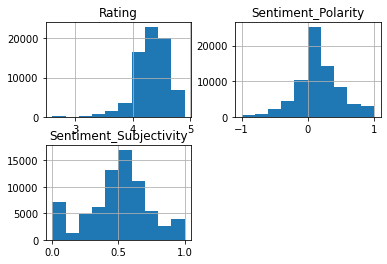

In [143]:
#lets visualize it by plotting a histogram
Merged_df.hist()

# Step 3. Exploratory Data Analysis(EDA) on combined data

**1. Sentiment Polarity Distribution**

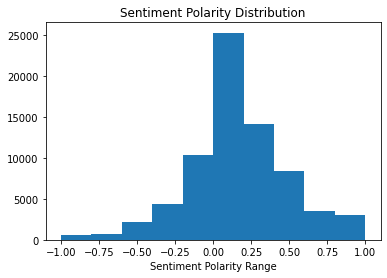

In [144]:
#lets plot a  histogram on sentiment Polarity to analyzise data
plt.hist(Merged_df[~Merged_df['Sentiment_Polarity'].isna()]['Sentiment_Polarity'])
plt.title("Sentiment Polarity Distribution")
plt.xlabel("Sentiment Polarity Range")
plt.show()


# From above sentiment polarity histogram,we can see that the sentiment polarity range is between 0 to 1.Therefore,the reviews on play store data is mostly positive


**2. Reviews sentiment in percent**

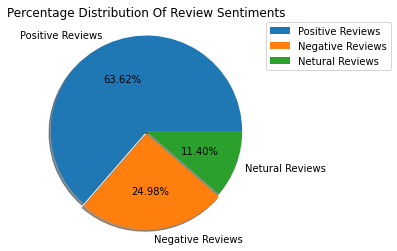

In [146]:
#lets see review sentiment in percent
Sentiment_count=Merged_df['Sentiment'].value_counts().to_list()
labels=['Positive Reviews','Negative Reviews',"Netural Reviews"]
plt.pie(x=Sentiment_count,labels=labels,autopct="%.2f%%",radius=1.1,shadow=True,explode=[0,0.03,0.001])
plt.title("Percentage Distribution Of Review Sentiments")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

# From above pie plot, we can see that most of the reviews given on play store data is positive(63.62%).And 24.98% given reviews are negative and 11.40% reviews are Neutral Reviews.

**3. Sentiment Subjectivity Distribution**

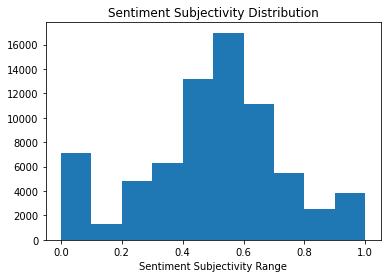

In [147]:
# lets plot a sentiment subjectivity distribution histigram
plt.hist(Merged_df[~Merged_df['Sentiment_Subjectivity'].isna()]['Sentiment_Subjectivity'])
plt.title("Sentiment Subjectivity Distribution")
plt.xlabel("Sentiment Subjectivity Range")
plt.show()

# From above sentiment subjectivity distribution histogram, we can see that most sentiment subjectivity range is from 0.4 to 0.6.Therefore,we can say that mostly user give review on the basis of their experiences.

# With this Note,We reached to the end of our exploration.Now,we are going for some question that can asked from our data and we will do conclusion of this amazing analysis.

**Questions and their answers from data** 

# QUS 1. Which are top ten most expensive apps?

In [156]:
#lets define a veriable for it
Ten_most_expensive_apps= df[df['Type'] == 'Paid'].sort_values(by='Price', ascending=False).head(11)


In [159]:
#lets calculate it
Ten_most_expensive_apps_df=Ten_most_expensive_apps[['App', 'Installs']].drop(9934)

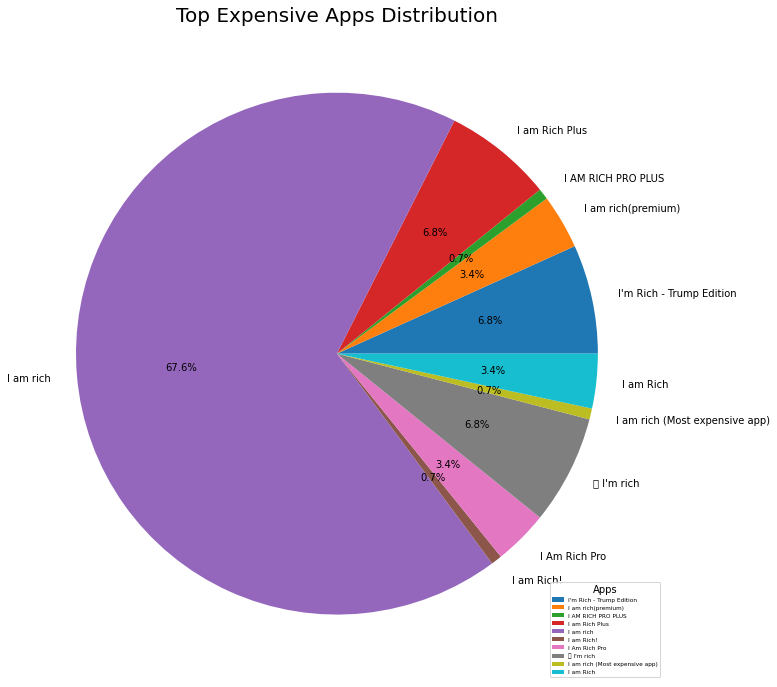

In [162]:
# lets plot it
plt.figure(figsize=(15,12));
plt.pie(Ten_most_expensive_apps_df.Installs, explode=None, labels=Ten_most_expensive_apps_df.App, autopct='%1.1f%%', startangle=0);
plt.title('Top Expensive Apps Distribution',size = 20);
plt.legend(Ten_most_expensive_apps_df.App, 
           loc="lower right",
           title="Apps",
           fontsize = "xx-small"
          );

From above pie plot, we conclude that "I am rich" is the most expensive app in  google play store.And the second most expensive app in google play store is "I am Rich plus".

# QUS 2.Which are the Apps with highest number of reviews?

In [163]:
Apps_with_Highest_rev = df.sort_values(by='Reviews', ascending=False).head(20)

In [164]:
Apps_with_Highest_rev

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
2544,Facebook,SOCIAL,4.1,78158306,20.500000,1000000000,Free,0.0,Teen,Social,2018-08-03
3943,Facebook,SOCIAL,4.1,78128208,42.000000,1000000000,Free,0.0,Teen,Social,2018-08-03
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316,47.666667,1000000000,Free,0.0,Everyone,Communication,2018-08-03
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,23.000000,1000000000,Free,0.0,Everyone,Communication,2018-08-03
3904,WhatsApp Messenger,COMMUNICATION,4.4,69109672,30.600000,1000000000,Free,0.0,Everyone,Communication,2018-08-03
2604,Instagram,SOCIAL,4.5,66577446,36.460000,1000000000,Free,0.0,Teen,Social,2018-07-31
2611,Instagram,SOCIAL,4.5,66577313,54.500000,1000000000,Free,0.0,Teen,Social,2018-07-31
2545,Instagram,SOCIAL,4.5,66577313,15.000000,1000000000,Free,0.0,Teen,Social,2018-07-31
3909,Instagram,SOCIAL,4.5,66509917,92.000000,1000000000,Free,0.0,Teen,Social,2018-07-31
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578,29.333333,1000000000,Free,0.0,Everyone,Communication,2018-08-01


From above data,We conclude that Facebook,Whatsapp Messenger,Instagram etc.are the most reviewed applications on playstore.

# Conclusions:---

# After analyzing this data,I came to know some very serious conclusions which i am mentioning below:---